# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2021**

Мягкий дедлайн: **25.10.21 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **28.10.21 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 8 (вроде)

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
    \nabla Q(w) = 2X^{T}(Xw - y)
$$

просто порадуйтесь за меня я никогда в жизни не пользовалась латексом и сейчас ради вас разобралась

In [351]:
import numpy as np

In [4]:
x = np.array([1, 2, 3])
w = np.array([1, 2, 3])

In [137]:
x.dot(w)

NameError: ignored

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam.jpg)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [352]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [436]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [354]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [355]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [356]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

In [357]:
regression.loss_history

[1.6047931363055274,
 1.6005288983956762,
 1.5952558779012207,
 1.5921498903730358,
 1.589700434875607,
 1.5868907765132803,
 1.5842993891690762,
 1.5818256893172824,
 1.579776267615965,
 1.5779325674993063,
 1.576161731031874]

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/29933/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/29933/run-report/55426888/


* **StochasticDescent**: https://contest.yandex.ru/contest/29933/run-report/55426968/


* **MomentumDescent**: https://contest.yandex.ru/contest/29933/run-report/55426998/


* **Adam**: https://contest.yandex.ru/contest/29933/run-report/55428481/


* **LinearRegression**:

ник в контесте - podosinnikov

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [358]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#from descents import get_descent
#from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [359]:
data = pd.read_csv('autos.csv')

In [360]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [361]:
data.gearbox.unique()

array(['manuell', 'automatik'], dtype=object)

In [362]:
data.notRepairedDamage.unique()

array(['nein', 'ja'], dtype=object)

In [365]:
categorical = ['brand', 'model', 'vehicleType', 'fuelType']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
binary = ['gearbox', 'notRepairedDamage']

если честно не верю, что машина на ходу может стоить меньше 100 долларов, потому:

In [366]:
cheap_yet_working = data[(data.price<100) & (data.notRepairedDamage== 'nein')].index
data.drop(cheap_yet_working, inplace = True)

Text(0, 0.5, 'сколько раз цена встретилась')

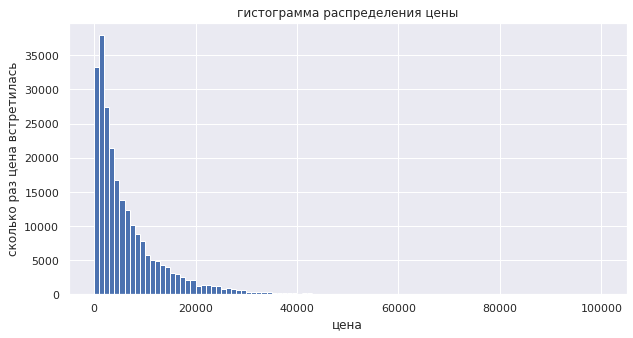

In [368]:
import seaborn as sns
data.price.hist(bins=100).set_title('гистограмма распределения цены')
plt.xlabel('цена')
plt.ylabel('сколько раз цена встретилась')

Text(0, 0.5, 'сколько раз цена встретилась')

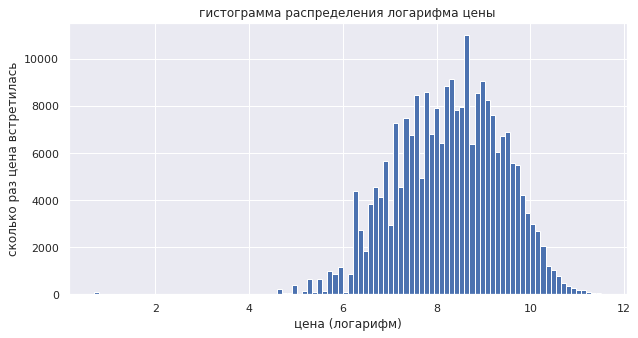

In [369]:
data['logprice'] = data['price'].apply(np.log1p)
data.logprice.hist(bins=100).set_title('гистограмма распределения логарифма цены')
plt.xlabel('цена (логарифм)')
plt.ylabel('сколько раз цена встретилась')

Text(0, 0.5, 'сколько раз цена встретилась')

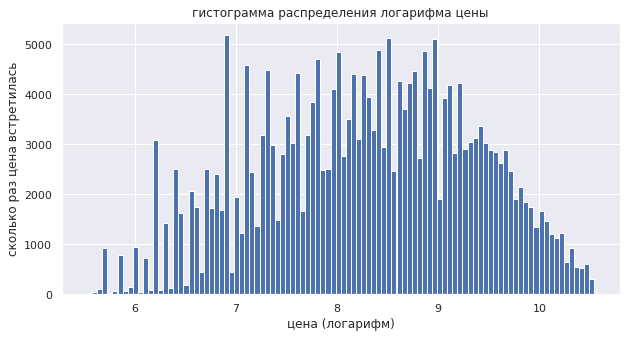

In [370]:
data = data[data['price'] < data['price'].quantile(0.99)]
data = data[data['price'] > data['price'].quantile(0.01)]
data.logprice.hist(bins=100).set_title('гистограмма распределения логарифма цены')
plt.xlabel('цена (логарифм)')
plt.ylabel('сколько раз цена встретилась')

я бы использовала логарифм, потому что 1) таргет по определению не может быть меньше 0 2) очень мило было смотреть на то, как цены на машины начинаются не с нуля, а с единицы - как будто предполагалось логарифмирование) 3) мы таки убираем перекос в значениях таргета, делаем зависимость линейнее

# вещественные

In [16]:
# ['powerPS', 'kilometer', 'autoAgeMonths']

In [371]:
min(data.powerPS) #ну хорошо хоть не 0

51

In [372]:
data = data[data['powerPS'] < data['powerPS'].quantile(0.99)]

Text(0, 0.5, 'сколько раз powerPS встретилась')

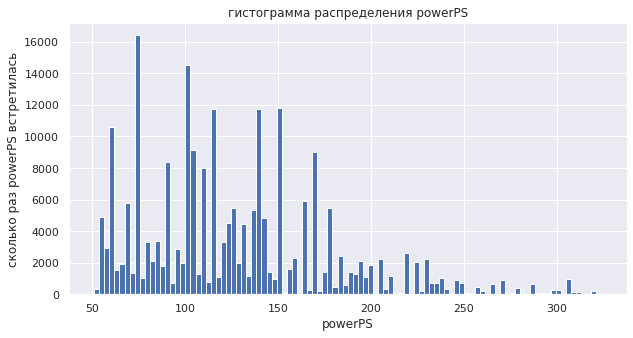

In [374]:
data.powerPS.hist(bins=100).set_title('гистограмма распределения powerPS')
plt.xlabel('powerPS')
plt.ylabel('сколько раз powerPS встретилась')

Text(0.5, 1.0, 'зависимость powerPS от таргета')

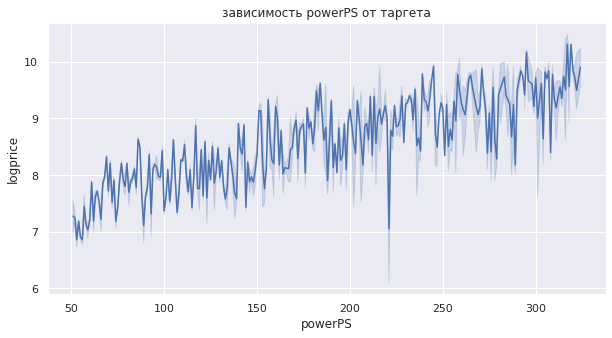

In [375]:
sns.lineplot(data = data, y = 'logprice', x = 'powerPS').set_title('зависимость powerPS от таргета')

In [376]:
data[['powerPS', 'logprice']].corr()

,powerPS,logprice
powerPS,1.000000,0.530929
logprice,0.530929,1.000000


Text(0, 0.5, 'сколько раз километраж встретился')

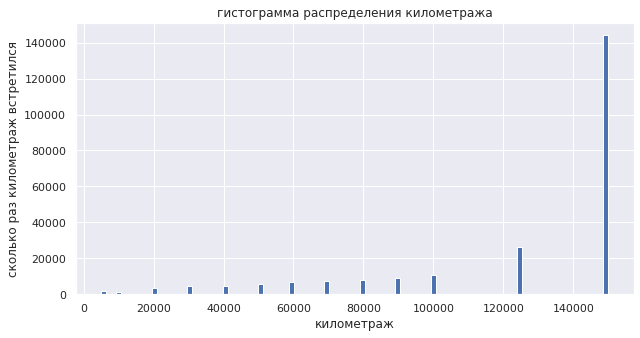

In [377]:
data.kilometer.hist(bins=100).set_title('гистограмма распределения километража')
plt.xlabel('километраж')
plt.ylabel('сколько раз километраж встретился')

вот тут с одной стороны переменная у нас категориальная, а с другой стороны я бы хотела сохранить в ней отношение между километражами, мол, что 0 таки меньше 100000. поэтому я оставлю ее в вещественных

In [378]:
data['logkilometer'] = data['kilometer'].apply(np.log1p)

Text(0.5, 1.0, 'корреляция logkilometer, kilometer и таргета')

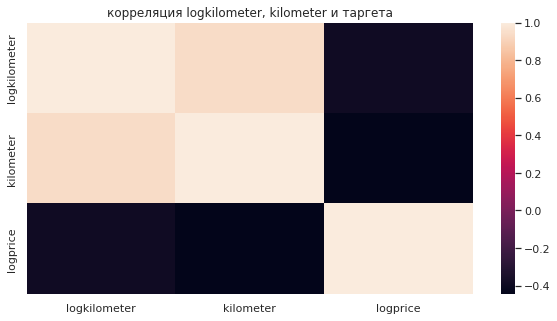

In [379]:
corr = data[['logkilometer', 'kilometer', 'logprice']].corr()
sns.heatmap(corr).set_title('корреляция logkilometer, kilometer и таргета')

лучше коррелирует обычный километраж (в обратную сторону), оставим его

In [380]:
data.drop(columns = 'logkilometer', inplace = True)

Text(0.5, 1.0, 'зависимость километража от таргета')

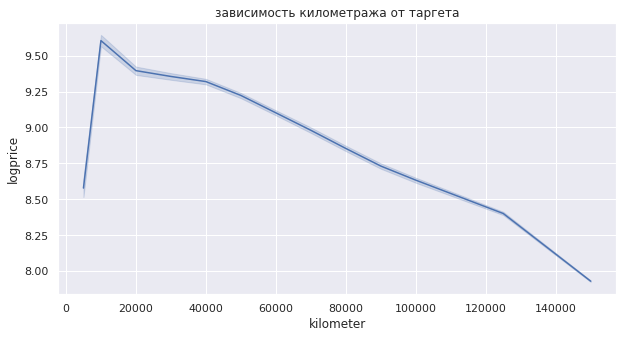

In [381]:
sns.lineplot(data = data, y = 'logprice', x = 'kilometer').set_title('зависимость километража от таргета')

я вот думаю что если километраж с 20000 как-то линейно зависим от цены, то то что меньше немного выпадает. думаю есть смысл сделать доп бинарную переменную которая показывает разные куски этого графика (кстати лол прикол хотите я короче сначала подумала что там есть нули и делала переменную 0 или не 0. естественно, нулей не было, поэтому у меня получался вектор полностью из единиц. этот вектор оказывался коллинеарным с байесом и у меня спуск не работал. я мучалась над этим несколько часов ура)

In [537]:
data['used'] = data['kilometer'].apply(lambda x: 0 if x <= 10000 else 1)

In [538]:
binary.append('used')

In [539]:
data = data[data['autoAgeMonths'] < data['autoAgeMonths'].quantile(0.99)]

Text(0, 0.5, 'сколько раз возраст встретился')

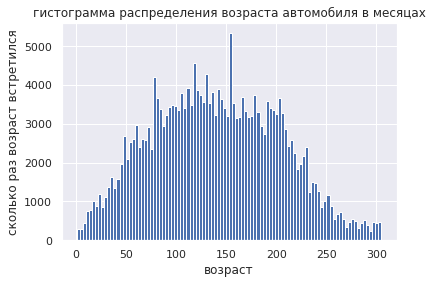

In [540]:
data.autoAgeMonths.hist(bins=100).set_title('гистограмма распределения возраста автомобиля в месяцах')
plt.xlabel('возраст')
plt.ylabel('сколько раз возраст встретился')

In [541]:
data[['autoAgeMonths', 'logprice']].corr()

,autoAgeMonths,logprice
autoAgeMonths,1.000000,-0.761944
logprice,-0.761944,1.000000


Text(0.5, 1.0, 'зависимость возраста автомобиля от таргета')

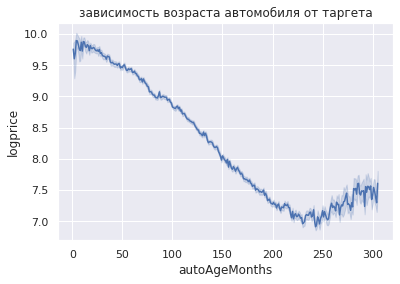

In [542]:
sns.lineplot(data = data, y = 'logprice', x = 'autoAgeMonths').set_title('зависимость возраста автомобиля от таргета')

сейм, тут есть 2 участка - с возрастанием и убыванием. разделим их

In [543]:
data['seasoned'] = data['autoAgeMonths'].apply(lambda x: 0 if x<240 else 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [544]:
binary.append('seasoned')

In [545]:
data.isnull().sum().sum()

0

еще хочу посмотреть на то, есть ли какие-то редкие категории, из-за которых градиент может быть нулевым на больших щагах

In [546]:
# categorical = ['brand', 'model', 'vehicleType', 'fuelType']

In [547]:
print(data.groupby(by = 'brand')['price'].count().nsmallest(4))
print(data.groupby(by = 'model')['price'].count().nsmallest(4))
print(data.groupby(by = 'vehicleType')['price'].count().nsmallest(4))
print(data.groupby(by = 'fuelType')['price'].count().nsmallest(4))

brand
lada      113
rover     226
lancia    267
daewoo    282
Name: price, dtype: int64
model
m_reihe      46
crossfire    51
kadett       56
r19          58
Name: price, dtype: int64
vehicleType
andere     1317
suv       10553
coupe     11534
cabrio    16194
Name: price, dtype: int64
fuelType
elektro     27
andere      28
hybrid     184
cng        425
Name: price, dtype: int64


In [548]:
gb = data.groupby(by = 'model')['price'].count()

In [549]:
d = {x:'0' for x in gb[gb<50].index}

In [550]:
data['model'].replace(d, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


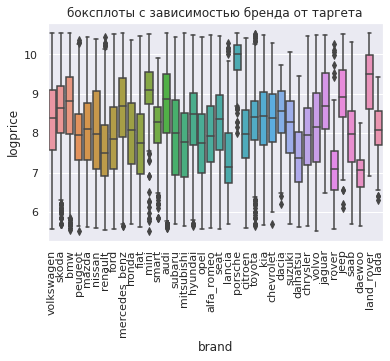

In [551]:
sns.boxplot(data = data, y = 'logprice', x = 'brand').set_title('боксплоты с зависимостью бренда от таргета')
plt.xticks(rotation = 'vertical')
pass

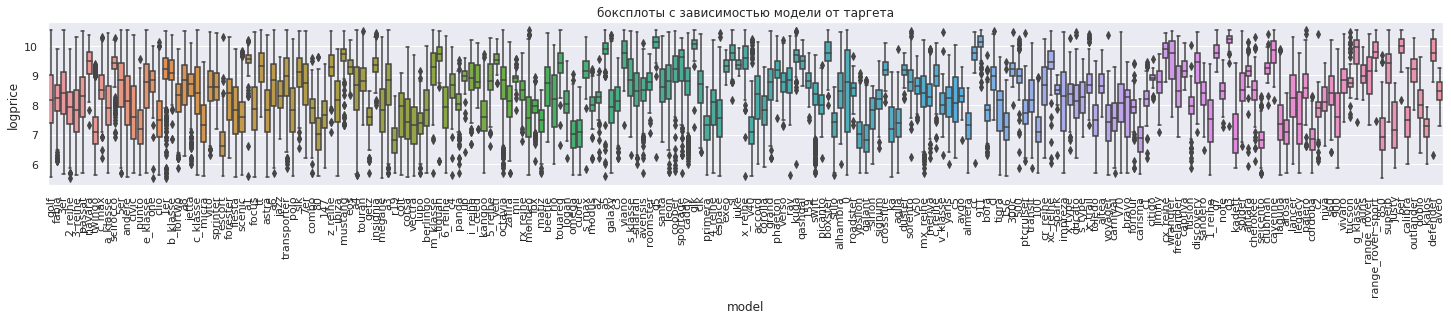

In [552]:
plt.rcParams['figure.figsize'] = 25, 3

sns.boxplot(data = data, y = 'logprice', x = 'model').set_title('боксплоты с зависимостью модели от таргета')
plt.xticks(rotation = 'vertical')
pass

Text(0.5, 1.0, 'боксплот с зависимостью нашей новой обобщающей машинной переменной от таргета')

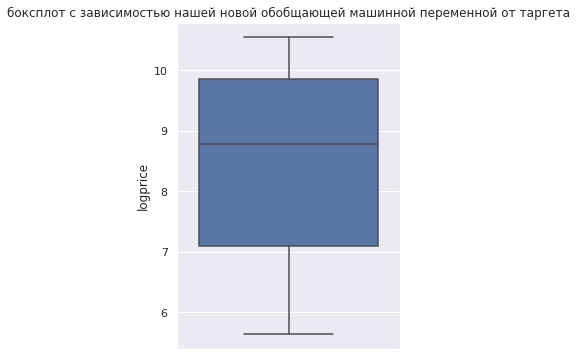

In [553]:
plt.rcParams['figure.figsize'] = 4, 6

sns.boxplot(data = data[data.model == '0'], y = 'logprice').set_title('боксплот с зависимостью нашей новой обобщающей машинной переменной от таргета')

типа работает

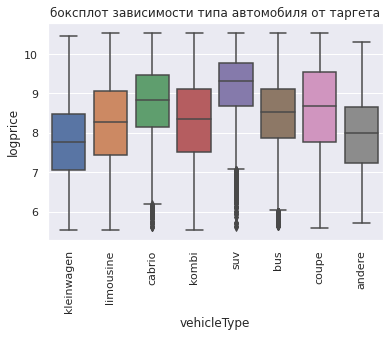

In [554]:
plt.rcParams['figure.figsize'] = 6, 4
sns.boxplot(data = data, y = 'logprice', x = 'vehicleType').set_title('боксплот зависимости типа автомобиля от таргета')
plt.xticks(rotation = 'vertical')
pass

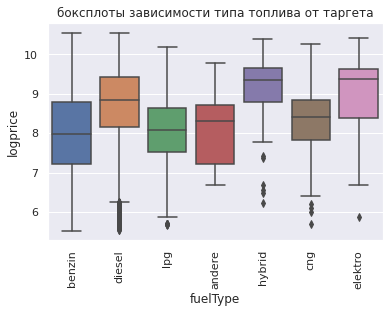

In [555]:
sns.boxplot(data = data, y = 'logprice', x = 'fuelType').set_title('боксплоты зависимости типа топлива от таргета')
plt.xticks(rotation = 'vertical')
pass

In [578]:
binary = ['gearbox', 'notRepairedDamage', 'seasoned']

In [579]:
x = data[categorical + numeric + binary]
x['bias'] = 1

y = data['logprice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [580]:
other = ['bias']

In [581]:
x = x.reset_index()
y = y.reset_index()['logprice']
x.drop(columns = 'index', inplace = True)

In [582]:
x.gearbox.unique()

array(['manuell', 'automatik'], dtype=object)

In [583]:
x['notRepairedDamage'].replace({'nein':0, 'ja':1}, inplace = True)
x['gearbox'].replace({'manuell':0, 'automatik':1}, inplace = True)

In [584]:
x[categorical].astype(str)

,brand,model,vehicleType,fuelType
0,volkswagen,golf,kleinwagen,benzin
1,skoda,fabia,kleinwagen,diesel
2,bmw,3er,limousine,benzin
3,peugeot,2_reihe,cabrio,benzin
4,mazda,3_reihe,limousine,benzin
...,...,...,...,...
228995,volkswagen,golf,limousine,diesel
228996,seat,leon,limousine,benzin
228997,smart,fortwo,cabrio,benzin
228998,volkswagen,transporter,bus,diesel


In [585]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', binary),
    ('bias',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [586]:
#8:1:1
from sklearn.model_selection import train_test_split

In [587]:
X_train, X_testval, y_train, y_testval = train_test_split(x, y.to_numpy(), test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_testval, y_testval, test_size=0.5, random_state=42)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [588]:
lambdas = np.logspace(-4, 1, 10)

In [589]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [590]:
#max_iter = 300
#tolerance = 1e-4

train_score = []
val_score = []
iterations = []
descent_type = []
lambda_value = []

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
  for my_lambda in lambdas:
    descent_config = {
        'descent_name': descent_name,
        'kwargs': {
            'lambda_': my_lambda,
            'dimension': X_train.shape[1]
        }
    }
    regression = LinearRegression(
        descent_config=descent_config,
        #tolerance=tolerance,
        #max_iter=max_iter
    )
    regression.fit(X_train, y_train)

    lambda_value.append(my_lambda)
    descent_type.append(descent_name)
    train_score.append(r2_score(regression.predict(X_train), y_train))
    val_score.append(r2_score(regression.predict(X_val), y_val))
    iterations.append(len(regression.loss_history))

КОРОЧЕ!!!!!!!!!!!!!! ТУТ БЫЛА ФИЧА КОТОРАЯ НАЗЫВАЛАСЬ USED - ТАМ БЫЛО ОЧЕНЬ МНОГО ЕДИНИЦ И ОЧЕНЬ МАЛО НУЛЕЙ. ИЗ-ЗА ЭТОГО ОНА НЕАДЕКВАТНО РАБОТАЛА ВМЕСТЕ С БАЙЕСОМ КОТОРЫЙ ПО СУТИ НУ ТАКОЙ ЖЕ. ДА ОКЕЙ ОНИ НЕ СОВСЕМ КОЛЛИНЕАРНЫ, НО ОНИ ПОЧТИ, ПОЭТОМУ ОНИ НЕ ДРУЖИЛИ. Я РЕШИЛА ИХ НЕ ДРУЖИТЬ И УБИЛА USED И ВСЕ ТЕПЕРЬ РАБОТАЕТ НО Я ТАК УСТАЛА ВЫ ПРЕДСТАВИТЬ СЕБЕ НЕ МОЖЕТЕ СПАСИБО ЧТО ПРИШЛИ НА МОЙ ТЕДТОЛК

In [591]:
lambda_analysis = pd.DataFrame({'descent':descent_type, 'lambda': lambda_value, 'train score': train_score, 'validation score': val_score, 'iterations': iterations})

In [592]:
lambda_analysis.sort_values(by = 'validation score', ascending = False)[:5] #лучшие пацаны

,descent,lambda,train score,validation score,iterations
39,adam,10.000000,0.836192,0.832693,151
38,adam,2.782559,0.835019,0.831683,124
37,adam,0.774264,0.834950,0.831347,140
36,adam,0.215443,0.828445,0.825325,196
27,momentum,0.774264,0.819110,0.815122,108


In [593]:
from tabulate import tabulate

In [594]:
for i in ['full', 'stochastic', 'momentum', 'adam']:
  #print(lambda_analysis[lambda_analysis['descent'] == i].nlargest(1, 'validation score'))
  print(tabulate(lambda_analysis[lambda_analysis['descent'] == i].nlargest(1, 'validation score'), headers='keys', tablefmt='psql'))

+----+-----------+----------+---------------+--------------------+--------------+
|    | descent   |   lambda |   train score |   validation score |   iterations |
|----+-----------+----------+---------------+--------------------+--------------|
|  8 | full      |  2.78256 |      0.801661 |           0.796718 |           71 |
+----+-----------+----------+---------------+--------------------+--------------+
+----+------------+----------+---------------+--------------------+--------------+
|    | descent    |   lambda |   train score |   validation score |   iterations |
|----+------------+----------+---------------+--------------------+--------------|
| 17 | stochastic | 0.774264 |      0.766995 |           0.765095 |          240 |
+----+------------+----------+---------------+--------------------+--------------+
+----+-----------+----------+---------------+--------------------+--------------+
|    | descent   |   lambda |   train score |   validation score |   iterations |
|----+-----

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [595]:
d = {}
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config = {
        'descent_name': descent_name,
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': 0.215443
        }
    }
    regression = LinearRegression(
        descent_config=descent_config,
        tolerance=tolerance,
        max_iter=max_iter
    )
    regression.fit(X_train, y_train)
    d[descent_name] = regression.loss_history

In [596]:
d.keys()

dict_keys(['full', 'stochastic', 'momentum', 'adam'])

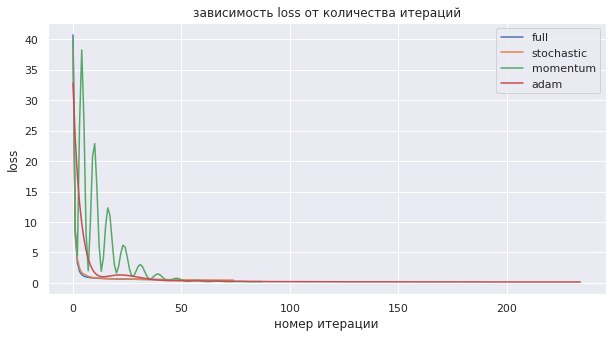

In [606]:
plt.rcParams['figure.figsize'] = 10, 5
plt.title('зависимость loss от количества итераций')
plt.ylabel('loss')
plt.xlabel('номер итерации')

for i in d.keys():
  sns.lineplot(y = d[i], x = [j for j in range(len(d[i]))], label = i)

на самом деле какой-то не очень очевидный результат, мне почему-то казалось, что у стохастического должен лосс так коряво изменяться. на наших данных и при этой альфе быстро сходится ванильный спуск и стохастический спуск, адам и моментум сходятся медленнее, моментум еще и прыгает как-то невнятно

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [325]:
import time

In [607]:
batch_sizes = np.arange(5, 500, 10)
iterations = []
times = []
for bs in batch_sizes:
    descent_config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': 0.215443,
            'batch_size': bs
        }
    }
    regression = LinearRegression(
        descent_config=descent_config,
        tolerance=tolerance,
        max_iter=max_iter
    )
    start_time = time.time()
    regression.fit(X_train, y_train)
    times.append(time.time() - start_time)
    iterations.append(len(regression.loss_history))

Text(0, 0.5, 'количество итераций')

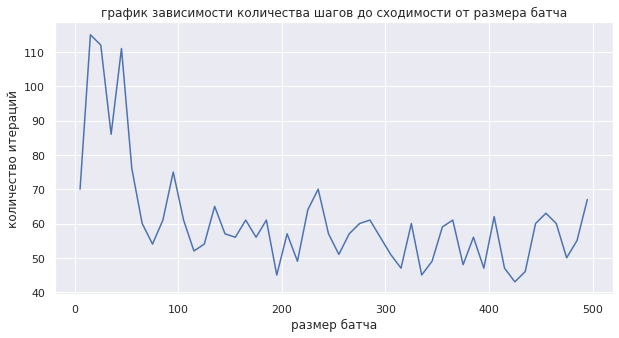

In [609]:
sns.lineplot(x = batch_sizes, y = iterations).set_title('график зависимости количества шагов до сходимости от размера батча')
plt.xlabel('размер батча')
plt.ylabel('количество итераций')


с увеличением размера батча уменьшается количество итераций, необходимых для сходимости. в общем-то чем больше у нас батч, тем больше стохастический спуск начинает напоминать ванильный, а там точнее всего антиградиент считается, пушто по всем объектам...

Text(0, 0.5, 'время до сходимости')

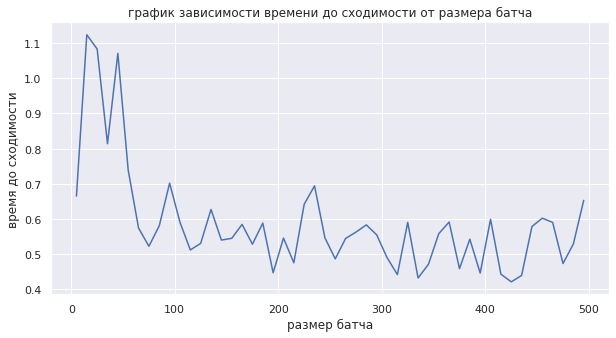

In [610]:
sns.lineplot(x = batch_sizes, y = times).set_title('график зависимости времени до сходимости от размера батча')
plt.xlabel('размер батча')
plt.ylabel('время до сходимости')

в целом, судя по графику, с увеличением числа батча уменьшается время сходимости. но, думаю, так будет продолжаться недолго, потому что если взять реально большой батч, по нему градиент будет считаться долго. так что надо соблюдать баланс между тем, чтобы по как можно меньшему числу объектов градиент считать и между тем, чтобы этот градиент был сколько-нибудь репрезентативным. судя по этому графику лучше всего брать батчи примерно в 200-400 объектов (точнее сказать сложно, можно было бы запустить несколько раз, чтобы усреднить результаты, но я уже закончилась)

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

In [345]:
w = np.array([1, 2, 3])
np.linalg.norm(w)

3.7416573867739413

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [340]:
print('kek')

kek


`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регресии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###` ну не смотрите его даже короче

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

In [ ]:
max_iter = 300
tolerance = 1e-4

train_score = []
val_score = []
iterations = []
descent_type = []
lambda_value = []

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
  for my_lambda in lambdas:
    descent_config = {
        'descent_name': descent_name,
        'kwargs': {
            'lambda_': my_lambda,
            'dimension': X_train.shape[1],
            'LossFunction' = LossFunction.LogCosh
        }
    }
    regression = LinearRegression(
        descent_config=descent_config,
        tolerance=tolerance,
        max_iter=max_iter
    )
    regression.fit(X_train, y_train)

    lambda_value.append(my_lambda)
    descent_type.append(descent_name)
    train_score.append(r2_score(regression.predict(X_train), y_train))
    val_score.append(r2_score(regression.predict(X_val), y_val))
    iterations.append(len(regression.loss_history))


### Социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, пора гулять в парках и общаться со своими одногруппниками. Прикрепите фотографию вашей прогулки с минимум пятью одногруппниками по какому-нибудь парку или бульвару. Кратко опишите ваши впечатления.

`### ваша прогулка тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: